# 7.4.1 Basic RNN

## Explanation of Basic RNN Architectures

Basic Recurrent Neural Networks (RNNs) are designed to handle sequential data by maintaining a hidden state that is updated at each time step. Unlike traditional feedforward neural networks, RNNs have connections that form directed cycles, enabling them to remember previous inputs and use this information to influence future outputs.

### Key Components of Basic RNNs

1. **Input Layer**: Receives the sequence data.
2. **Recurrent Layer**: Maintains a hidden state that is updated at each time step based on the current input and the previous hidden state. The hidden state is computed using a non-linear activation function such as tanh or ReLU.
3. **Output Layer**: Produces the output for each time step based on the hidden state.

### Mathematical Formulation

At each time step $t$, the hidden state $h_t$ is computed as:
$$
h_t = \tanh(W_h h_{t-1} + W_x x_t + b_h)
$$
where:
- $h_{t-1}$ is the hidden state from the previous time step,
- $x_t$ is the input at time step $t$,
- $W_h$ and $W_x$ are weight matrices,
- $b_h$ is a bias term.

The output at each time step $t$ is given by:
$$
y_t = W_y h_t + b_y
$$
where:
- $W_y$ is the weight matrix for the output layer,
- $b_y$ is a bias term.

___
___
### Readings:
- [Recurrent Neural Networks (RNNs)](https://towardsdatascience.com/recurrent-neural-networks-rnns-3f06d7653a85)
- [Recurrent Neural Networks (RNN) from Basic to Advanced](https://medium.com/@sachinsoni600517/recurrent-neural-networks-rnn-from-basic-to-advanced-1da22aafa009)
- [What is Recurrent Neural Networks (RNN)?](https://www.analyticsvidhya.com/blog/2022/03/a-brief-overview-of-recurrent-neural-networks-rnn/)
- [Recurrent Neural Networks](https://d2l.ai/chapter_recurrent-neural-networks/index.html)
- [Recurrent Neural Networks](https://srdas.github.io/DLBook/RNNs.html)
- [Recurrent neural networks and their applications in NLP](https://slds-lmu.github.io/seminar_nlp_ss20/recurrent-neural-networks-and-their-applications-in-nlp.html)
___
___

## Applications of RNNs in Sequence Data

RNNs are particularly useful for tasks involving sequential data, including:

- **Time Series Forecasting**: Predicting future values based on historical data, such as stock prices or weather patterns.
- **Natural Language Processing (NLP)**: Tasks such as language modeling, text generation, sentiment analysis, and machine translation.
- **Speech Recognition**: Converting spoken language into text.
- **Sequence Prediction**: Predicting the next item in a sequence, such as in musicb

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt

# Load and preprocess the IMDB dataset
max_features = 10000  # Number of words to consider as features
maxlen = 500          # Cut texts after this number of words
batch_size = 32

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
print(len(X_train), "train sequences")
print(len(X_test), "test sequences")

X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


25000 train sequences
25000 test sequences
X_train shape: (25000, 500)
X_test shape: (25000, 500)


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Define the RNN model
model_rnn = Sequential([
    tf.keras.layers.Input(shape=(maxlen,)),
    tf.keras.layers.Embedding(max_features, 128),
    SimpleRNN(64, return_sequences=False),
    Dense(1, activation='sigmoid')
])

In [3]:
# Compile the model
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_rnn = model_rnn.fit(X_train, y_train, epochs=5, batch_size=batch_size, validation_split=0.2)

# Evaluate the model
rnn_loss, rnn_accuracy = model_rnn.evaluate(X_test, y_test)
print(f'RNN Test Accuracy: {rnn_accuracy * 100:.2f}%')

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 64s 100ms/step - accuracy: 0.5981 - loss: 0.6526 - val_accuracy: 0.7470 - val_loss: 0.5178
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 67s 107ms/step - accuracy: 0.8037 - loss: 0.4393 - val_accuracy: 0.7782 - val_loss: 0.5044
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 68s 108ms/step - accuracy: 0.9368 - loss: 0.1756 - val_accuracy: 0.8024 - val_loss: 0.5574
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 67s 107ms/step - accuracy: 0.9800 - loss: 0.0710 - val_accuracy: 0.7746 - val_loss: 0.6901
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 65s 104ms/step - accuracy: 0.9899 - loss: 0.0341 - val_accuracy: 0.7314 - val_loss: 0.6738
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.7247 - loss: 0.6963
RNN Test Accuracy: 72.45%


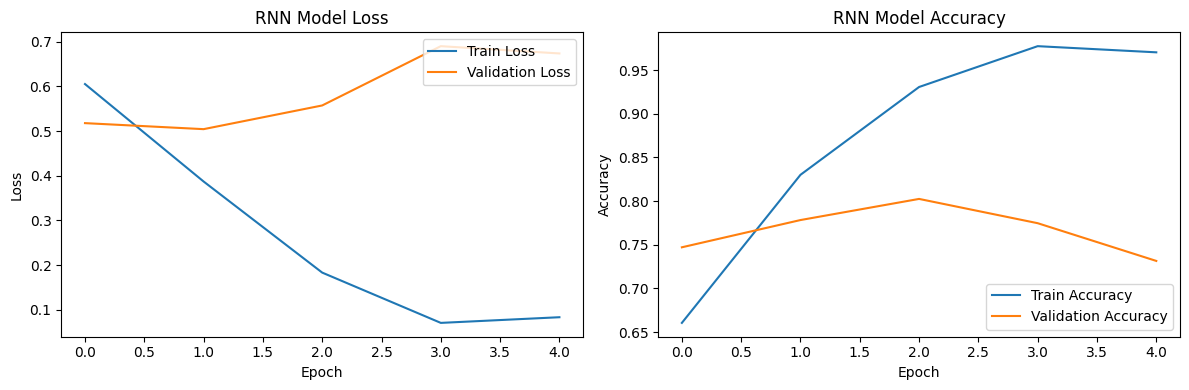

In [4]:
# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history_rnn.history['loss'], label='Train Loss')
plt.plot(history_rnn.history['val_loss'], label='Validation Loss')
plt.title('RNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history_rnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_rnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('RNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step


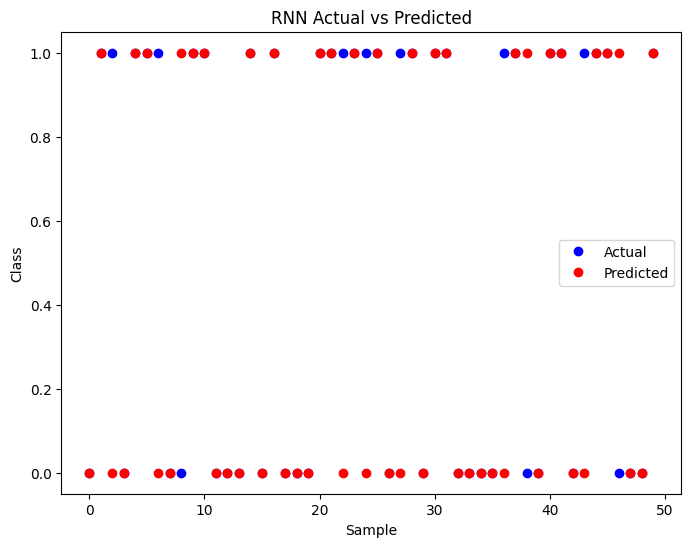

In [5]:
# Make predictions
y_pred_rnn = model_rnn.predict(X_test)
y_pred_rnn_classes = (y_pred_rnn > 0.5).astype("int32")

# Visualize predictions
plt.figure(figsize=(8, 6))
plt.plot(y_test[:50], 'bo', label='Actual')
plt.plot(y_pred_rnn_classes[:50], 'ro', label='Predicted')
plt.title('RNN Actual vs Predicted')
plt.xlabel('Sample')
plt.ylabel('Class')
plt.legend()
plt.show()

## Conclusion

In this section, we explored the basic architecture and implementation of Recurrent Neural Networks (RNNs). We applied RNNs to the IMDB dataset for sentiment analysis, demonstrating the process of defining, training, and evaluating a simple RNN model using TensorFlow and Keras. The model's performance was visualized, showing both the training history and a comparison of actual vs. predicted labels. RNNs are powerful tools for handling sequential data, and understanding their basic implementation is a crucial step toward mastering more advanced recurrent architectures.
